# Bharat Intern

# Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

# Import Necessary Libraries:

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Data:

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

# Exploratory Data Analysis (EDA):

In [3]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print("\nDataset information:")
data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
print("\nDistribution of labels:")
data['v1'].value_counts()


Distribution of labels:


ham     4825
spam     747
Name: v1, dtype: int64

# Data Preprocessing:

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


False

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization
    return text

In [9]:
data['clean_text'] = data['v2'].apply(clean_text)

In [10]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah dont think go usf life around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,nd time tried contact u u å£ pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,guy bitching acted like id interested buying s...


# Feature Engineering:

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(data['clean_text'])
y = data['v1']

# Split the Data:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model:

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# Evaluate the Model:

In [14]:
y_pred = model.predict(X_test)

print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Evaluation:
Accuracy: 0.9775784753363229
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   0]
 [ 25 125]]


# Data Visualization:

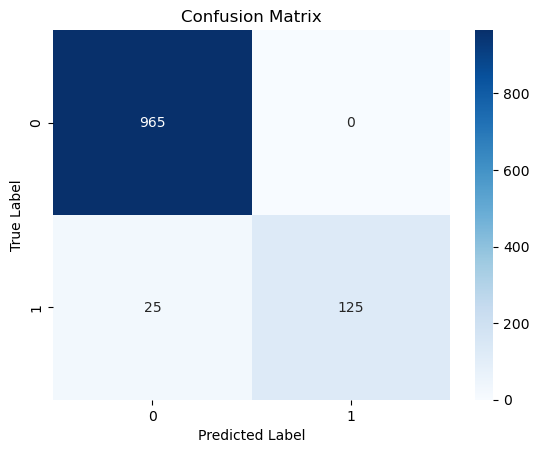

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()